# Projeto: Ligações para o 911

### Para este projeto analisarei alguns dados de chamadas do 911 do Kaggle. Os dados contém os seguintes campos:

- lat: Variável String, Latitude
- lng: Variável String, Longitude
- desc: Variável String, Descrição da Chamada de Emergência
- zip: Variável String, CEP
- título: Variável String, Título
- timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
- twp: Variável String, Township
- addr: Variável String, Endereço
- e: Variável String, variável Dummy (sempre 1)

### Dados e Configuração

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Lendo o arquivo e verificando as informações

In [2]:
df = pd.read_csv('911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


### Verificando as 5 primeiras linhas do DataFrame usando o cabeçalho (Head)

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Perguntas básicas

### Quais são os top 5 CEPs nas chamadas 911? 

In [5]:
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

### Quais são os 5 principais municípios nas chamadas 911?

In [6]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

### Quantos códigos de título exclusivos existem na coluna title?

In [7]:
len(df['title'].unique()) ## Ou Poderia usar a função .nunique() Exemplo = df['title'].nunique()

148

## Criando novos recursos

#### Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS", "Fire" e "Traffic"

#### Aqui eu criarei uma coluna nova (Reason) contendo o valor das 'Razões'

##### Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS.

** Observação: EMS significa "Emergency Medical Services"

In [8]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

### Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna?

In [9]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

### Usando Seaborn para criar um countplot de chamadas 911 baseadas nesta nova coluna.

<AxesSubplot:xlabel='Reason', ylabel='count'>

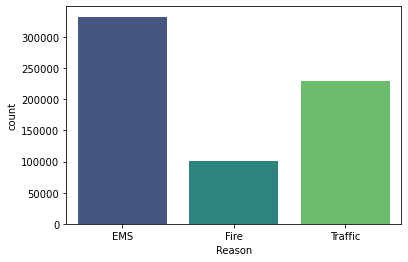

In [10]:
sns.countplot(x='Reason', data=df, palette='viridis')

### Agora vamos começar a focar em informações de tempo. Qual é o tipo de dados dos objetos na coluna timeStamp?

In [11]:
type(df['timeStamp'].iloc[0])

str

### Convertendo a coluna de strings em objetos DateTime, o que me permite consultar por dia, mês ou ano.

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

### Verificando o tipo de dados convertidos

In [13]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

### Agora que a coluna timestamp é realmente de objetos DateTime, Criaremos 3 novas colunas chamadas Hour, Month e Day of week.

In [14]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [18]:
df['Day of Week'].value_counts()

4    102942
2     99157
3     98683
1     97684
0     96745
5     89452
6     78859
Name: Day of Week, dtype: int64

### Observei que a coluna 'Day of Week' é um número inteiro de 0 a 6. Então utilizei o .map() para mapear os nomes das seqências reais para o dia da semana

In [19]:
dmap = { 0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:"Sun" }

In [20]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [21]:
df['Day of Week'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: Day of Week, dtype: object

### Usando Seaborn para criar um countplot da coluna "Day of Week" com hue na coluna Reason

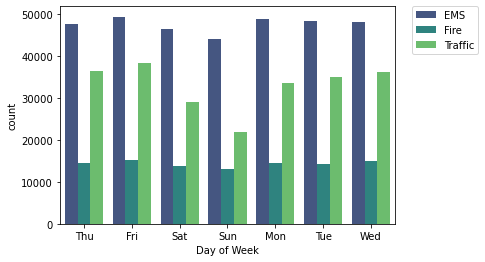

In [23]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### O mesmo para o mês:

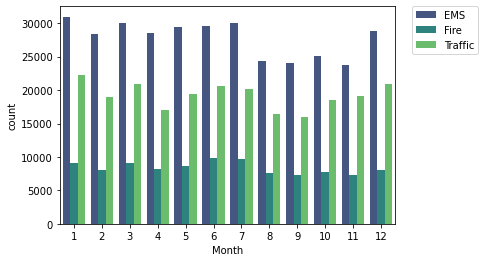

In [24]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Agrupando por mês e vendo a contagem dos valores

In [27]:
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


### Criando um plot simples indicando a contagem de chamadas por mês

<AxesSubplot:xlabel='Month'>

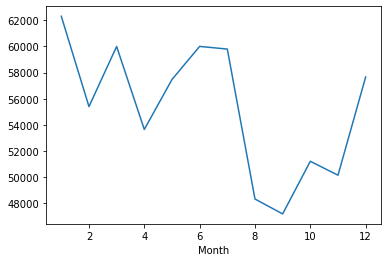

In [28]:
byMonth['twp'].plot()

### Criando um Linear Model (Modelo Linear), usando lmplot do Seaborn no número de chamadas por mês. Para isso é necessário resetar o índice em uma coluna.

In [29]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
5,6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
6,7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240


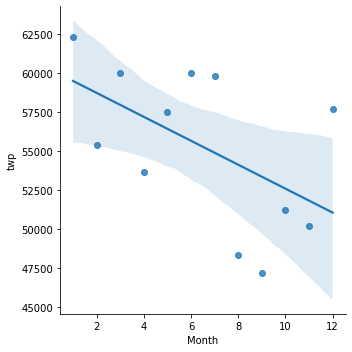

In [30]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

### Criando uma nova coluna (Data) contendo a data da coluna timeStamp.

In [31]:
df['Date'] = df['timeStamp'].apply(lambda x:x.date())

In [32]:
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

### Agrupando o DataFrame pela coluna Data, contando as ocorrencias (por data), e plotando um gráfico.

In [33]:
df.groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,318,318,318,271,318,318,318,318,318,318,318,318,318
2020-07-26,296,296,296,271,296,296,296,296,296,296,296,296,296
2020-07-27,329,329,329,288,329,329,329,329,329,329,329,329,329


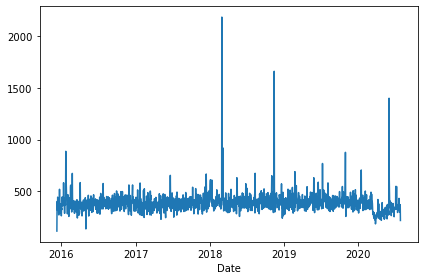

In [37]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

### O mesmo gráfico, mas agora para cada tipo de razão de ocorrencia (Reason)

Text(0.5, 1.0, 'Traffic')

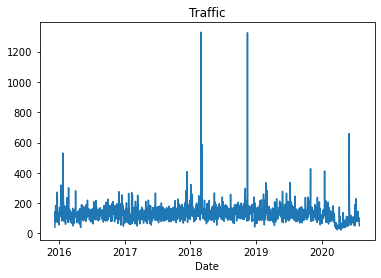

In [39]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

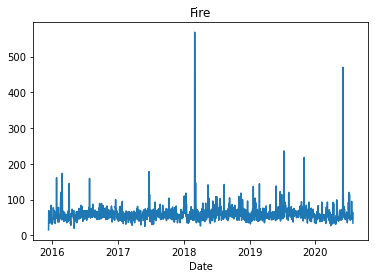

In [40]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

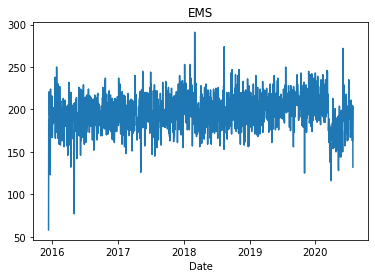

In [41]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')

### Criando mapas de calor
#### Reestruturando o quadro de dados para que as colunas se tornem horas e o indice o dia da semana.

In [42]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head(3)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965


### Criando um Heatmap (Mapa de Calor) usando este DataFrame.

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

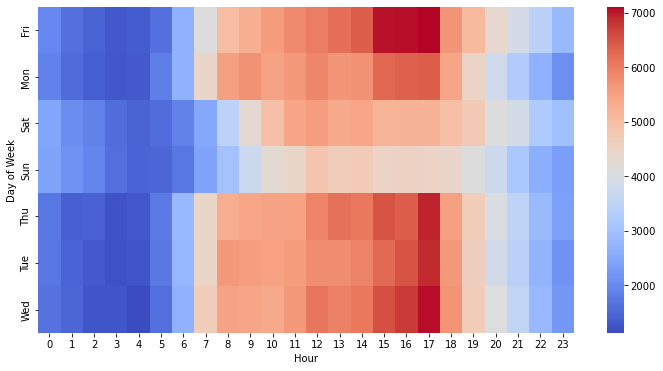

In [43]:
plt.figure(figsize=(12, 6))
sns.heatmap(dayHour, cmap='coolwarm')

### Criando um clustermap usando este DataFrame.

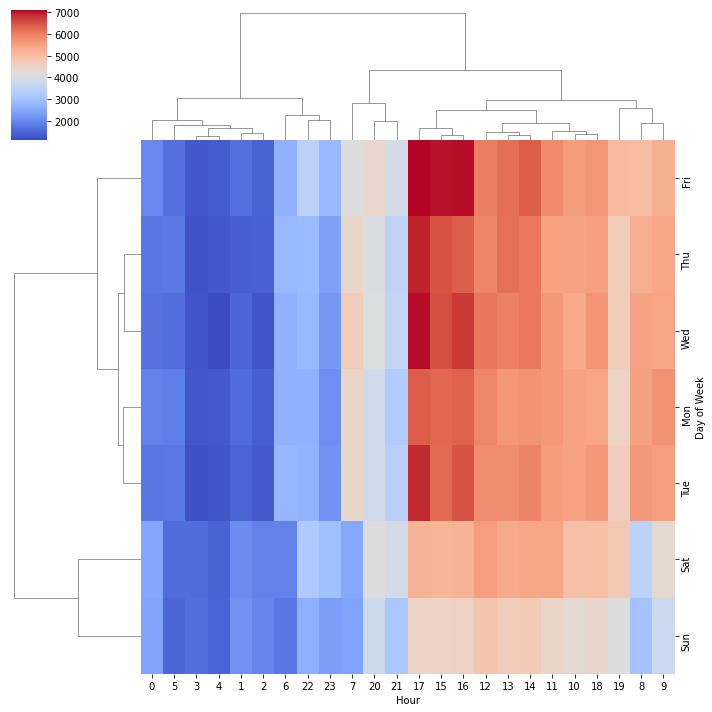

In [45]:
sns.clustermap(dayHour, cmap='coolwarm')

### Como podemos ver, os dias da semana e as horas não estão em ordem. Eles foram agrupados por similaridades. Isso permite identificar mais facilmente que, por exemplo, no meio do mês (dias 16,17,15,12,13,14), durante a semana, (entre segunda e sexta / Mon - Fri) estão os dias com maior ligações para o 911. E que os primeiros dias (0,5,1,4,2,3) são os dias com menos ocorrências

### Repetirei os últimos plots para um DataFrame que mostra o mês como a coluna.

In [48]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['twp'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9305,8251,10932,7995,8899,9202,8677,7332,7689,6931,8379,9303
Mon,8894,8743,8057,8407,7876,8510,9496,6853,6598,8068,6716,8489
Sat,8467,7589,8043,7511,7221,8195,7745,6108,6563,6607,6767,8588
Sun,7476,6450,6763,6862,6688,6832,7854,5272,5955,6315,5194,7162
Thu,9053,7995,8849,7721,8736,9486,8376,7502,6952,7482,8353,8147


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

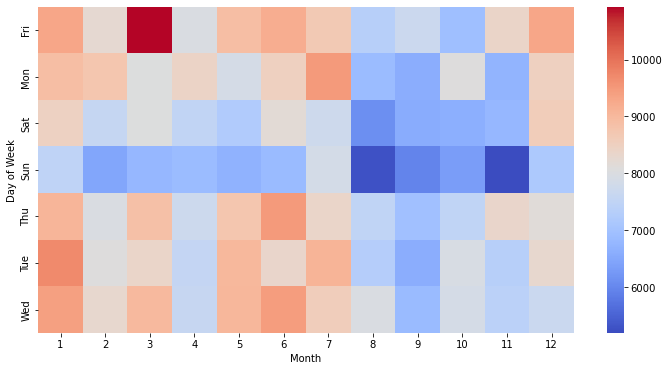

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='coolwarm')

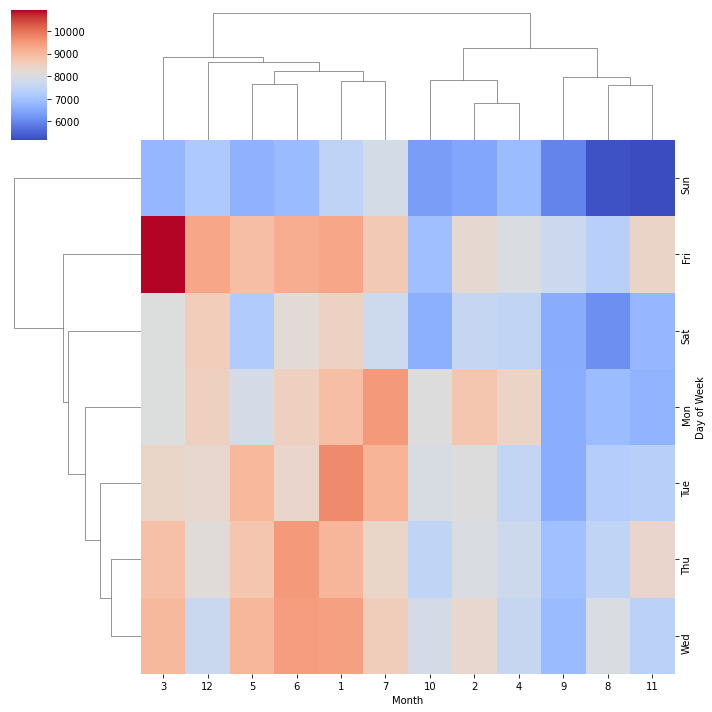

In [50]:
sns.clustermap(dayMonth,cmap='coolwarm')